## Exercise 1 - **Car travel**

The goal of this exercise is to familiarise with:
- code structure `# Physics, # Numerics, # Time loop, # Visualisation`
- array initialisation
- `for` loop & `if` condition
- update rule
- solving ODEs

A car cruises on a straight road at given speed $\mathrm{V = 113}$ km/h for 16 hours, making a U-turn after a distance $\mathrm{L = 200}$ km. The car speed is defined as the change of position its $x$ per time $t$:
$$
V = \frac{\partial x}{\partial t}
$$

In the above derivative, $\partial x$ and $\partial t$ are considered infinitesimal - a representation it is not possible to handle within a computer (as it would require infinite amount of resources). However, we can discretise this differential equation in order to solve it numerically by transforming the infinitesimal quantities into discrete increments:
$$
V = \frac{\partial x}{\partial t} \approx \frac{\Delta x}{\Delta t} = \frac{x_{t+\Delta t}-x_t}{\Delta t}~,
$$
where $\Delta x$ and $\Delta t$ are discrete quantities. This equation can be re-organised to return an explicit solution of the position $x$ at time $t+\Delta t$:
$$
x_{t+\Delta t} = x_{t} + V \Delta t~.
$$

1. Based on this equation, your task is to setup a numerical model to predict the position of the car as function of time. In order not to start from scratch this time, you can complete the code draft below, filling in the relevant quantities in following order:

In [1]:
using Plots

@views function car_travel_1D()
    # Physical parameters

    # Numerical parameters

    # Array initialisation

    # Time loop

    # Visualisation

    return
end

car_travel_1D()

2. Implement a condition to allow you doing U-turns whenever you reach the position $x=0$ or $x=200$.

The sample code you can use to get started looks like:

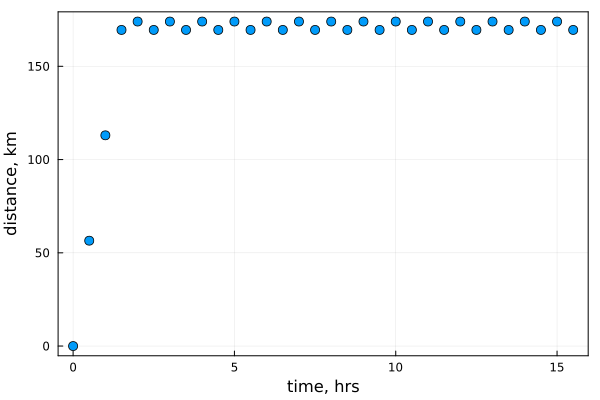

In [27]:
using Plots

@views function car_travel_1D()
    # Physical parameters
    V     =     113    # speed, km/h
    L     =     200   # length of segment, km
    ttot  =     16    # total time, h
    # Numerical parameters
    dt    = 0.5            # time step, h
    nt    = Int(cld(ttot, dt))  # number of time steps
    # Array initialisation
    T  = Array{Float64}(undef, nt)
    X  = Array{Float64}(undef, nt)

    # Time loop
    for it = 2:nt
        T[it] = T[it-1] + dt
        X[it] =  X[it-1] + V*dt  # move the car
        if X[it] > L
            X[it] = L - (X[it] - L)  # if beyond L, go back (left)
        elseif X[it] < 0
            X[it] = -X[it]  # if beyond 0, go back (right)
        end
    end
    # Visualisation
    display(scatter(T, X, markersize=5,
                    xlabel="time, hrs", ylabel="distance, km",
                    framestyle=:box, legend=:none))
    return
end

car_travel_1D()

Note that you can extend the first code (from step 1) to include the U-turns and use your final code to reply to the question.

### Question 1

Once the code is running, test various time step increments `0.1 < dt < 1.0` and briefly comment on your findings.